# Affect of various features on Heating and Cooling loads in a building

This notebook was created to complete the project requirements of DSE200x
at UCSDx through EDx <br><br>
Original dataset [here](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#)
<br><br>Dataset created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).
<br><br> All code, analysis, and figures are original work by Chris May [(Github)](https://github.com/pezLyfe) unless otherwise noted
<br><br>
## Description of Dataset by the sources: 
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

### Explanation of the Variables within the dataset:
The variable names in the data dictionary were somewhat unclear. A dive into the associated academic paper gave better results. The paper is reference in the citations section, but for convenience the variable meanings are given below.
<br>
    
Relative compactness | Surface area | Wall area | Roof area | Overall height 
:---: | :---: | :---: | :---: |:---: 
Surface area/volume | m<sup>2</sup> | m<sup>2</sup> | m<sup>2</sup> | m

Value | 1 | 2 | 3 | 4 
:---: | :---: | :---: | :---: |:---: 
Direction | North | South | East | West

Value | 0 | .10 | .25 | .40 
:---: | :---: | :---: | :---: |:---: 
Glazing % of floor area | 0 | 10% | 25% | 40%

Value | 0 | 1 | 2 | 3 | 4 
:---: | :---: | :---: | :---: |:---: | :---:
Glazing area distribution | None | Uniform | North bias | East bias | South bias | West bia

Heating Load | Cooling Load
:---: | :---: 
kWh/m<sup>2</sup> | kWh/m<sup>2</sup>

All buildings have the same volume, with different surface areas and individual dimensions. The materials of construction for the walls, floors, roof, and windows were modeled as being the same, and as such have the same insulating values. 

In [2]:
import numpy as np
import pandas as pd 
import sklearn as skl
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/chrismay/Desktop/UCSDx/PythonDS/finalProject/energyEfficiencyData.csv')
df.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

# Data cleaning 
<br> This data was generated by an analysis program, so the column headers are pretty useless. Luckily the data dictionary provided with the set gave us the column names. Let's rename the columns to something we can understand

In [3]:
df.columns = ['RelCompactness', 'Surface Area', 'Wall Area', 'Roof Area','Overall Height', \
             'Orientation', 'Glazing Area','Glazing Area Distro', 'HeatLoad', 'CoolLoad']
df.head()

RelCompactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0            0.98         514.5      294.0     110.25             7.0   
1            0.98         514.5      294.0     110.25             7.0   
2            0.98         514.5      294.0     110.25             7.0   
3            0.98         514.5      294.0     110.25             7.0   
4            0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distro  HeatLoad  CoolLoad  
0            2           0.0                    0     15.55     21.33  
1            3           0.0                    0     15.55     21.33  
2            4           0.0                    0     15.55     21.33  
3            5           0.0                    0     15.55     21.33  
4            2           0.0                    0     20.84     28.28

In [4]:
df.shape #let's see how big this dataset is

(768, 10)

First let's comb through and see if there are any missing values in the dataset

In [5]:
missing = pd.isnull(df) #Returns a dataframe of boolean values. If a null value is present, returns True, else False
notMissing = ~missing #Create a new dataframe that's the inverse of the missing values (data present = True)
df = df[notMissing] #Filter based on the inverse boolean dataframe. The new dataframe will only contain rows with values
df.shape #Check the shape of the new dataframe to see if anything got dropped


(768, 10)

After combing through the dataframe it looks like there were no entries missing. Now let's check and make sure all the entries are the type we want them to be

In [6]:
df.dtypes #Returns a list of each column and their corresponding data type

RelCompactness         float64
Surface Area           float64
Wall Area              float64
Roof Area              float64
Overall Height         float64
Orientation              int64
Glazing Area           float64
Glazing Area Distro      int64
HeatLoad               float64
CoolLoad               float64
dtype: object

Great, all of the columns are either floats or ints. This project is looking like a piece of cake

# Data exploration

In [7]:
df.describe()

RelCompactness  Surface Area   Wall Area   Roof Area  Overall Height  \
count      768.000000    768.000000  768.000000  768.000000       768.00000   
mean         0.764167    671.708333  318.500000  176.604167         5.25000   
std          0.105777     88.086116   43.626481   45.165950         1.75114   
min          0.620000    514.500000  245.000000  110.250000         3.50000   
25%          0.682500    606.375000  294.000000  140.875000         3.50000   
50%          0.750000    673.750000  318.500000  183.750000         5.25000   
75%          0.830000    741.125000  343.000000  220.500000         7.00000   
max          0.980000    808.500000  416.500000  220.500000         7.00000   

       Orientation  Glazing Area  Glazing Area Distro    HeatLoad    CoolLoad  
count   768.000000    768.000000            768.00000  768.000000  768.000000  
mean      3.500000      0.234375              2.81250   22.307201   24.587760  
std       1.118763      0.133221              1.55096   10.090196    9.513306  
min       2.000000      0.000000              0.00000    6.010000   10.900000  
25%       2.750000      0.100000              1.75000   12.992500   15.620000  
50%       3.500000      0.250000              3.00000   18.950000   22.080000  
75%       4.250000      0.400000              4.00000   31.667500   33.132500  
max       5.000000      0.400000              5.00000   43.100000   48.030000

Each row in this dataset represents a unique combination of features that were used as inputs to model the heating and cooling loads in a building simulation. So we can create a couple of scatter plots to get an idea of how the heating and cooling loads vary across different features.
<br><br>First, let's take a look and see how heating loads and cooling loads vary in each entry 

Text(0.5,1,'Heating Loads vs. Cooling Loads')

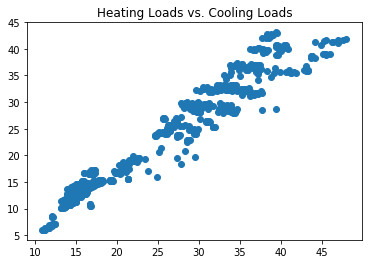

In [8]:
y = df['HeatLoad']
x = df['CoolLoad']
plt.scatter(x, y)
plt.title('Heating Loads vs. Cooling Loads')

As expected, buildings with a high heating load also have a high cooling load. 
<br>There seems to be a bit of an assymetry when the loads are at the higher end. In the 35 to 45 range on cooling loads, there seems to be a relatively higher heating load. 
<br><br>I'll have to remember to look at that deeper when we do our analysis. next let's see how relative compactness affects each

Text(0.5,1,'Cooling vs. Rel Compactness')

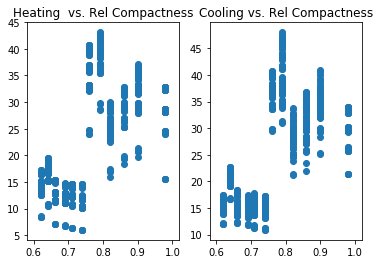

In [13]:
hy = df['HeatLoad']
hx = df['RelCompactness']
cy = df['CoolLoad']
cx = df['RelCompactness']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Rel Compactness')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Rel Compactness')

Ok, the buildings are generally more energy efficient on low relative compactness values, but things get weird above 0.75. There must be other factors that affect the target variables

Text(0.5,1,'Cooling vs. Surf Area')

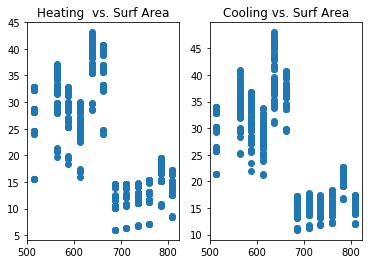

In [15]:
hy = df['HeatLoad']
hx = df['Surface Area']
cy = df['CoolLoad']
cx = df['Surface Area']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Surf Area')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Surf Area')

There's a big difference between the smaller surface area values and the larger surface areas. Interesting to note, there must be something in the geometries above a certain number

Text(0.5,1,'Cooling vs. Wall Area')

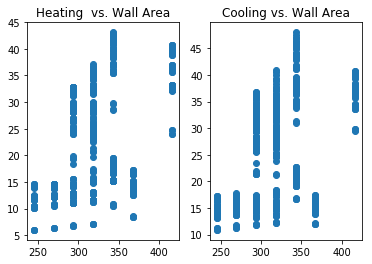

In [16]:
hy = df['HeatLoad']
hx = df['Wall Area']
cy = df['CoolLoad']
cx = df['Wall Area']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Wall Area')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Wall Area')

I'm a markdown cell

Text(0.5,1,'Cooling vs. Roof Area')

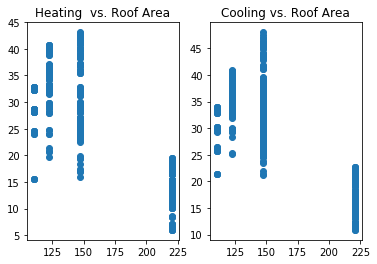

In [17]:
hy = df['HeatLoad']
hx = df['Roof Area']
cy = df['CoolLoad']
cx = df['Roof Area']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Roof Area')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Roof Area')

The really big roof areas are probably due to the buildings being low and squat

Text(0.5,1,'Cooling vs. Height')

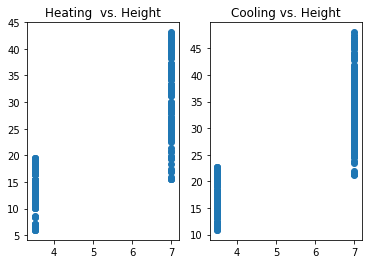

In [18]:
hy = df['HeatLoad']
hx = df['Overall Height']
cy = df['CoolLoad']
cx = df['Overall Height']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Height')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Height')

Text(0.5,1,'Cooling vs. Orientation')

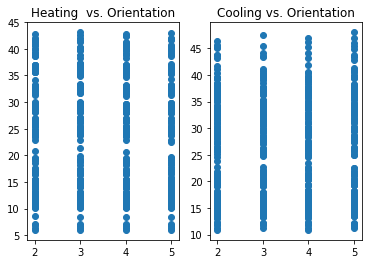

In [19]:
hy = df['HeatLoad']
hx = df['Orientation']
cy = df['CoolLoad']
cx = df['Orientation']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Orientation')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Orientation')

Text(0.5,1,'Cooling vs. Glaze Area')

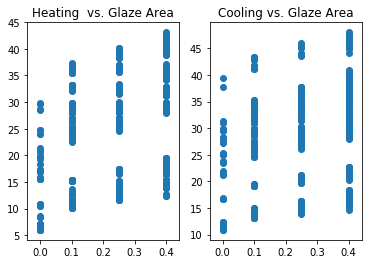

In [20]:
hy = df['HeatLoad']
hx = df['Glazing Area']
cy = df['CoolLoad']
cx = df['Glazing Area']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Glaze Area')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Glaze Area')

Text(0.5,1,'Cooling vs. Glaze Distro')

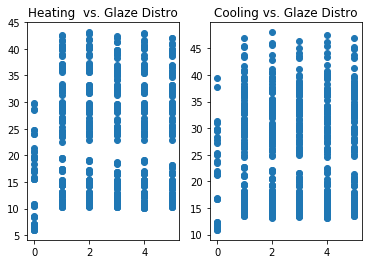

In [21]:
hy = df['HeatLoad']
hx = df['Glazing Area Distro']
cy = df['CoolLoad']
cx = df['Glazing Area Distro']

plt.subplot(1, 2, 1)
plt.scatter(hx, hy)
plt.title('Heating  vs. Glaze Distro')

plt.subplot(1, 2, 2)
plt.scatter(cx, cy)
plt.title('Cooling vs. Glaze Distro')

One things that's been definitely  clear is that overall height has an outsize affect on the heating and cooling loads. That's not a super helpful start though. In the dataset provided, there's only two measurements provided, and they're vastly different. Let's hold overall height constant and take a look at the distributions again

In [48]:
shortDFMask =  df['Overall Height'] == 3.5 #Returns a dataframe of boolean values, where True = rows w/height of 3.5
tallDFMask = ~shortDFMask #Create a new dataframe that's the inverse of the missing values (height of 7 = True)
shortDF = df[shortDFMask] #Filter based on the inverse boolean dataframe
tallDF = df[tallDFMask]

In [52]:
shortDF.shape, tallDF.shape #Check the shape to make sure the filter stuck

((384, 10), (384, 10))

In [53]:
shortDF.head(), shortDF.tail() #Check the start and end entries of the short buildings

(    RelCompactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 24            0.74         686.0      245.0      220.5             3.5   
 25            0.74         686.0      245.0      220.5             3.5   
 26            0.74         686.0      245.0      220.5             3.5   
 27            0.74         686.0      245.0      220.5             3.5   
 28            0.71         710.5      269.5      220.5             3.5   
 
     Orientation  Glazing Area  Glazing Area Distro  HeatLoad  CoolLoad  
 24            2           0.0                    0      6.07     10.90  
 25            3           0.0                    0      6.05     11.19  
 26            4           0.0                    0      6.01     10.94  
 27            5           0.0                    0      6.04     11.17  
 28            2           0.0                    0      6.37     11.27  ,
      RelCompactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 763            0.64       

In [54]:
tallDF.head(), tallDF.tail() #Check the head and tail of the tall entries

(   RelCompactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 0            0.98         514.5      294.0     110.25             7.0   
 1            0.98         514.5      294.0     110.25             7.0   
 2            0.98         514.5      294.0     110.25             7.0   
 3            0.98         514.5      294.0     110.25             7.0   
 4            0.90         563.5      318.5     122.50             7.0   
 
    Orientation  Glazing Area  Glazing Area Distro  HeatLoad  CoolLoad  
 0            2           0.0                    0     15.55     21.33  
 1            3           0.0                    0     15.55     21.33  
 2            4           0.0                    0     15.55     21.33  
 3            5           0.0                    0     15.55     21.33  
 4            2           0.0                    0     20.84     28.28  ,
      RelCompactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 739            0.79         637.0     